In [1]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
import string, re
import nltk
import tensorflow as tf
import time

from nltk.corpus import stopwords   
from nltk.stem.porter import PorterStemmer
from gensim.models import KeyedVectors
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

D:\anaconda\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
D:\anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [128]:

df=pd.read_csv('train.csv')

df.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,1,startup_1,NaN,"Dec 11, 2018",Current Employee,Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,4.0,5.0,5.0,4.0,5.0,0,5.0
1,2,startup_1,"Mountain View, CA","Jun 21, 2013",Former Employee,Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2.0,3.0,3.0,5.0,3.0,2094,5.0
2,3,startup_1,"New York, NY","May 10, 2014",Current Employee,Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,4.0,5.0,5.0,4.0,949,5.0
3,4,startup_1,"Mountain View, CA","Feb 8, 2015",Current Employee,Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2.0,5.0,5.0,4.0,5.0,498,4.0
4,10,startup_1,NaN,"Dec 9, 2018",Current Employee,Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5.0,5.0,5.0,5.0,5.0,0,4.0


In [129]:
df.overall.value_counts()

4.0    10688
3.0     9510
5.0     5975
2.0     3531
1.0      632
Name: overall, dtype: int64

In [130]:
type(df.job_title.value_counts()[:10].index)

pandas.core.indexes.base.Index

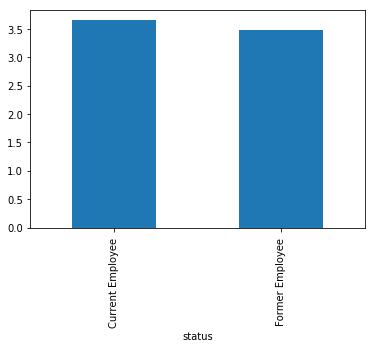

In [183]:
df.groupby(['status'])['overall'].mean().plot.bar()

In [132]:
grouped = df.groupby(['job_title'])['overall'].mean().reset_index()
grouped.sort_values('overall', ascending=False)

,job_title,overall
3919,vendredvd Apprendre mieux Apple,5.0
1432,IT Consultant/Project Analyst,5.0
3267,Software Development Engineer In Test (SDET) III,5.0
1102,Field Representative,5.0
1109,Filfillment Ambassador,5.0
1126,Floor Supervosor,5.0
1136,Former Prep Leader,5.0
1138,Fraud,5.0
3247,Software Development Engineer (Intern),5.0
1140,Fraud Department,5.0


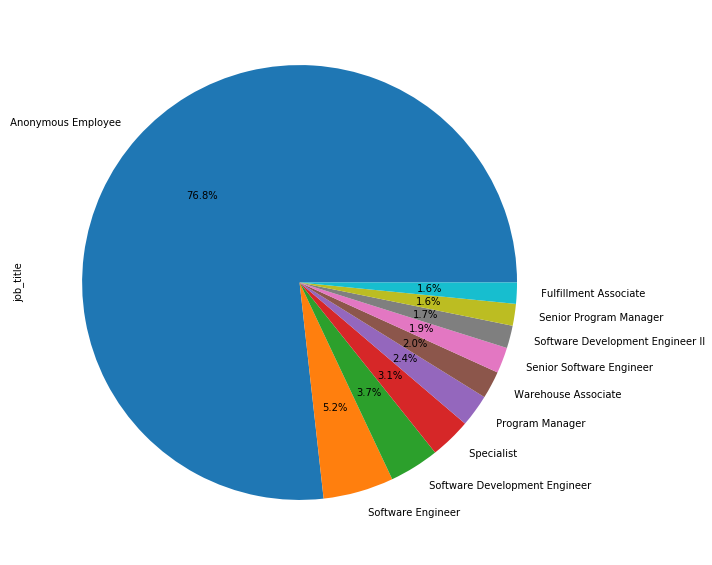

In [133]:
df.job_title.value_counts()[:10].plot.pie(figsize=(10,10),autopct='%1.1f%%')

In [134]:

df.date=df.date.apply(lambda x:x.split(',')[1] if len(x.split(','))>1 else '0000')
#df.date=df.date.astype('object')

#df.location=df.location.apply(lambda x:x.split(',')[1] if len(x.split(','))>1 else "NA")

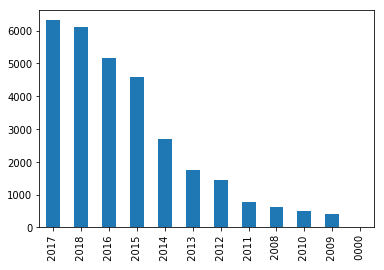

In [143]:
df.date.value_counts().plot.bar()

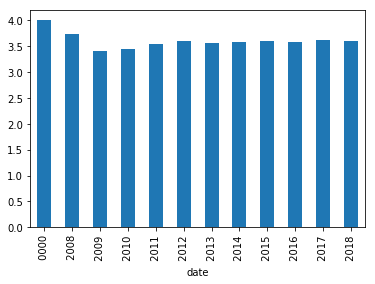

In [151]:
grouped1 = df.groupby(['date'])['overall'].mean()
#grouped1.sort_values('date', ascending=False).plot.bar()
grouped1.plot.bar()

AttributeError: 'float' object has no attribute 'split'

In [155]:
df.location.fillna("",inplace=True)

In [156]:
df.location=df.location.apply(lambda x:x.split(',')[1] if len(x.split(','))>1 else "NA")

In [163]:
grouped1 = df.groupby(['location'])['overall'].mean()
grouped1.sort_values(ascending=False)

location
 Manila (Philippines)               5.000000
 West (Singapore)                   5.000000
 Douglas                            5.000000
 NB (Canada)                        5.000000
 Kermanshah (Iran)                  5.000000
 Fairfax                            5.000000
 Chongqing (China)                  4.500000
 Islamabad (Pakistan)               4.500000
 Amman Governorate (Jordan)         4.500000
 NS (Canada)                        4.500000
 Karnataka (India)                  4.333333
 Punjab (India)                     4.333333
 AK                                 4.200000
 IA                                 4.125000
 AR                                 4.125000
 NH                                 4.066667
 Greater Poland (Poland)            4.000000
 Rajasthan (India)                  4.000000
 HI                                 4.000000
 Federal District (Brazil)          4.000000
 SD                                 4.000000
 Gansu (China)                      4.000000
 

In [136]:
df.job_title.value_counts()

 Anonymous Employee                                 12079
 Software Engineer                                    825
 Software Development Engineer                        583
 Specialist                                           480
 Program Manager                                      378
 Warehouse Associate                                  322
 Senior Software Engineer                             302
 Software Development Engineer II                     264
 Senior Program Manager                               255
 Fulfillment Associate                                247
 Manager                                              175
 Senior Software Development Engineer                 147
 Mac Specialist (Apple Store)                         145
 Family Room Specialist                               142
 Software Development Engineer In Test (SDET)         137
 Director                                             132
 Product Manager                                      127
 Area Manager 

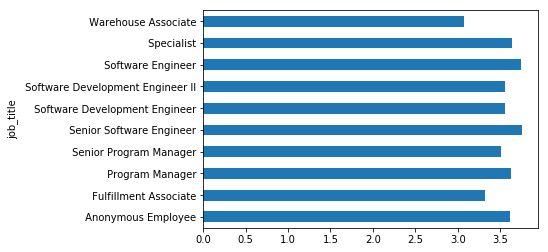

In [137]:
df[df['job_title'].isin(list(df.job_title.value_counts()[:10].index))].groupby(['job_title'])['overall'].mean().plot.barh()

# Cleaning Data

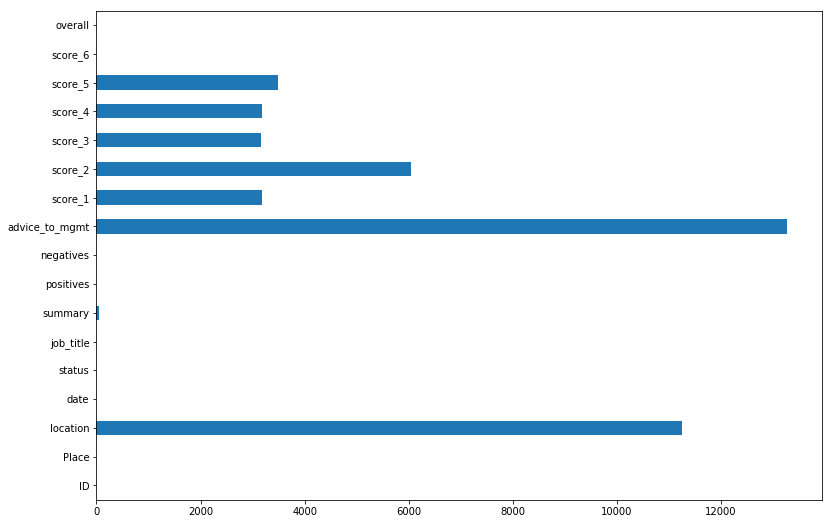

In [3]:
plt.figure(figsize=(13,9))
df.isnull().sum().plot.barh()

In [164]:
# fill NA values 
df.score_1.fillna(0,inplace=True)
df.score_2.fillna(0,inplace=True)
df.score_3.fillna(0,inplace=True)
df.score_4.fillna(0,inplace=True)
df.score_5.fillna(0,inplace=True)
df.fillna("",inplace=True)

In [165]:
df.isnull().sum()

ID                0
Place             0
location          0
date              0
status            0
job_title         0
summary           0
positives         0
negatives         0
advice_to_mgmt    0
score_1           0
score_2           0
score_3           0
score_4           0
score_5           0
score_6           0
overall           0
dtype: int64

In [166]:
df.describe()

,ID,score_1,score_2,score_3,score_4,score_5,score_6,overall
count,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000
mean,33998.602716,3.016482,3.029964,3.250841,3.529124,2.940763,1.388482,3.588179
std,19506.284643,1.607771,1.907985,1.605680,1.561302,1.628599,21.390609,0.996981
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,17198.750000,2.000000,1.000000,2.000000,3.000000,2.000000,0.000000,3.000000
50%,34121.500000,3.000000,4.000000,4.000000,4.000000,3.000000,0.000000,4.000000
75%,50907.500000,4.000000,5.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,67528.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2094.000000,5.000000


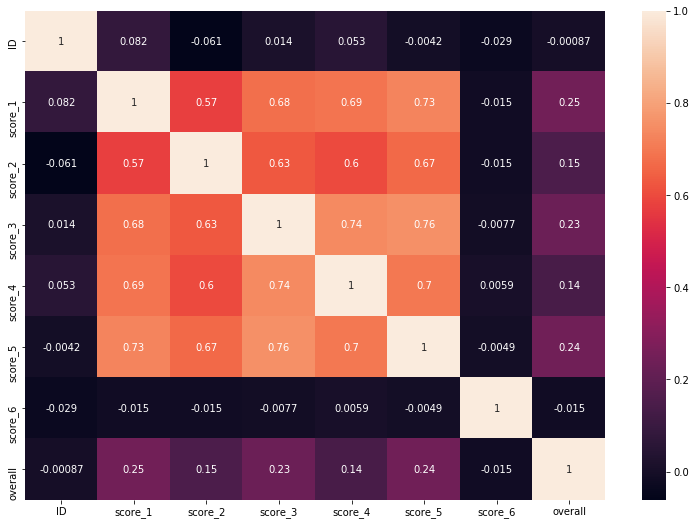

In [167]:
plt.figure(figsize=(13,9))
sns.heatmap(df.corr(),annot=True)

In [168]:
len(df.job_title.unique())

3920

In [169]:
len(df.Place.unique())

6

In [170]:
len(df.location.unique())

144

In [171]:
len(df.status.unique())

2

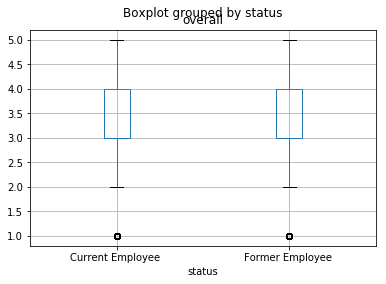

In [172]:
df.boxplot(column='overall',by='status')

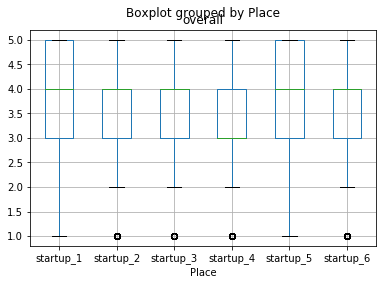

In [13]:
df.boxplot(column='overall',by='Place')

In [173]:


df['reviewerinfo']=df.location+' '+df.status+' '+df.date+' '+df.Place+' '+df.job_title

In [174]:
y=df.overall.values

In [16]:
#df.drop(['ID','Place','location','date','status','job_title','score_6','overall'],inplace=True,axis=1)

In [17]:
df.head()

,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,reviewerinfo
0,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,,4.0,5.0,5.0,4.0,5.0,"Current Employee Dec 11, 2018 startup_1 An..."
1,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,2.0,3.0,3.0,5.0,3.0,"Mountain View, CA Former Employee Jun 21, 20..."
2,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,4.0,5.0,5.0,4.0,"New York, NY Current Employee May 10, 2014 s..."
3,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,2.0,5.0,5.0,4.0,5.0,"Mountain View, CA Current Employee Feb 8, 20..."
4,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,,5.0,5.0,5.0,5.0,5.0,"Current Employee Dec 9, 2018 startup_1 Ano..."


# Apply stemming ,remove stopwords  

In [175]:

sw=stopwords.words('english')
ps=PorterStemmer()
def cleadtxt(s):
    s=s.translate(str.maketrans('', '', string.punctuation))
    s=s.lower()
    s=s.split(' ')
    s=[ps.stem(w) for w in s if w not in sw and w.isdigit()!=True and len(w)>3]
    s=' '.join(s)
    
    
    return s

In [176]:

df.advice_to_mgmt=df.advice_to_mgmt.apply(lambda x:cleadtxt(x))
df.positives=df.positives.apply(lambda x:cleadtxt(x))
df.negatives=df.negatives.apply(lambda x:cleadtxt(x))
df.summary=df.summary.apply(lambda x:cleadtxt(x))
df.reviewerinfo=df.reviewerinfo.apply(lambda x:cleadtxt(x))

In [177]:
df.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall,reviewerinfo
0,1,startup_1,NA,2018,Current Employee,Anonymous Employee,best compani work,peopl smart friendli,bureaucraci slow thing,,4.0,5.0,5.0,4.0,5.0,0,5.0,current employe startup1 anonym employe
1,2,startup_1,CA,2013,Former Employee,Program Manager,move speed light burn inevit,food food food cafe main campu alon minikitche...,worklif balanc balanc perk benefit illus keep ...,dont dismiss emot intellig adapt leadership th...,2.0,3.0,3.0,5.0,3.0,2094,5.0,former employe startup1 program manag
2,3,startup_1,NY,2014,Current Employee,Software Engineer III,great balanc bigcompani secur fastmov project,your softwar engin your among king hill googl ...,becom larger come grow pain bureaucraci slow r...,keep focu user everyth els follow,5.0,4.0,5.0,5.0,4.0,949,5.0,current employe startup1 softwar engin
3,4,startup_1,CA,2015,Current Employee,Anonymous Employee,best place work also demand,cant find wellregard compani actual deserv hyp...,live commut take hour hour shuttl sometim hour...,keep micromanag huge benefit googl huge worklo...,2.0,5.0,5.0,4.0,5.0,498,4.0,current employe startup1 anonym employe
4,10,startup_1,NA,2018,Current Employee,Anonymous Employee,execel engin,impact driven best tech world,size matter engin disconnect custom,,5.0,5.0,5.0,5.0,5.0,0,4.0,current employe startup1 anonym employe


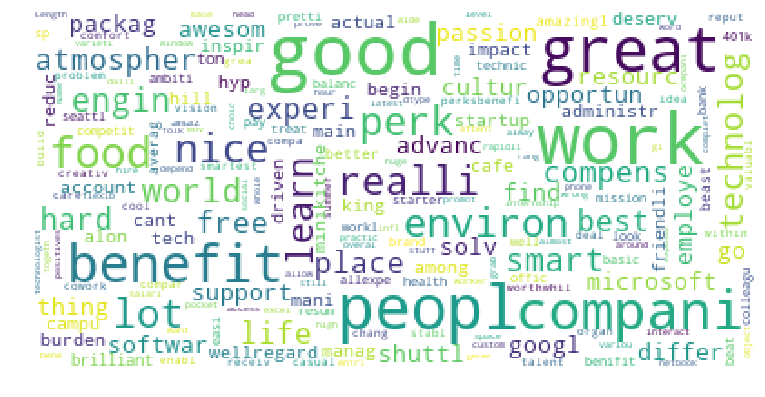

In [180]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)


wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['positives']))

print(wordcloud)
fig = plt.figure(1,figsize=(13,13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

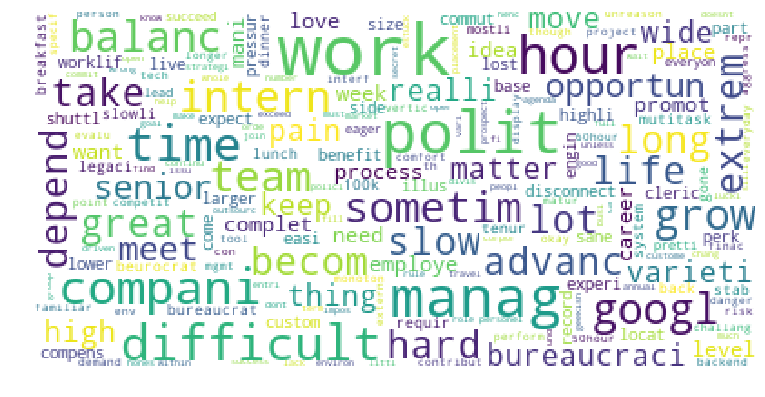

In [181]:

stopwords = set(STOPWORDS)


wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['negatives']))

print(wordcloud)
fig = plt.figure(1,figsize=(13,13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)



In [206]:
cvect=CountVectorizer(ngram_range=(1,3))



In [207]:
xt=cvect.fit_transform(df.positives)

In [208]:
xt.toarray()

MemoryError: 

In [ ]:
cvect.vocabulary_.items()

In [ ]:
type(cvect.vocabulary_.items())

In [198]:
cvect.vocabulary_.keys()

dict_keys(['peopl', 'smart', 'friendli', 'food', 'cafe', 'main', 'campu', 'alon', 'minikitchen', 'snack', 'drink', 'free', 'breakfastlunchdinn', 'errrday', 'benefitsperk', 'access', 'self', 'servic', 'laundri', 'washerdry', 'avail', 'bowl', 'alley', 'volley', 'ball', 'custombuilt', 'exclus', 'employe', 'outdoor', 'sport', 'park', 'healthfit', 'assess', 'dogfriendli', 'compens', 'googl', 'updat', 'packag', 'competit', 'size', 'organ', 'remain', 'rel', 'innov', 'nimbl', 'fastpac', 'open', 'commun', 'definit', 'chang', 'wors', 'mani', 'depart', 'focu', 'area', 'product', 'theori', 'plenti', 'opportun', 'grow', 'career', 'horizont', 'vertic', 'practic', 'true', 'work', 'brightest', 'hardworkingdilig', 'mind', 'industri', 'there', 'your', 'softwar', 'engin', 'among', 'king', 'hill', 'engineerdriven', 'compani', 'without', 'doubt', 'still', 'engineerfocus', 'perk', 'amaz', 'breakfast', 'lunch', 'dinner', 'everi', 'weekday', 'aaaaaamaz', 'holiday', 'parti', 'waldorf', 'astoria', 'public', 'li

In [205]:
d = pd.Series(xt.toarray().flatten(), 
              index = cvect.get_feature_names()).sort_values(ascending=False)

ax = d[:10].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=45)
ax.title.set_size(18)

ValueError: Length of passed values is 328660224, index implies 10834

In [ ]:
sh=pd.Series(cvect.vocabulary_.values(),index=cvect.vocabulary_.keys())

In [203]:
sh.head()

peopl       (7089, 8756, 3962, 3816, 1499, 5833, 1531, 450...
smart       (7089, 8756, 3962, 3816, 1499, 5833, 1531, 450...
friendli    (7089, 8756, 3962, 3816, 1499, 5833, 1531, 450...
food        (7089, 8756, 3962, 3816, 1499, 5833, 1531, 450...
cafe        (7089, 8756, 3962, 3816, 1499, 5833, 1531, 450...
dtype: object

In [61]:

tfdf= TfidfVectorizer(min_df=5,max_df=0.7,max_features=5000, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

In [62]:


X_pos=tfdf.fit_transform(df.positives)


In [63]:
X_pos.toarray().shape

(30336, 5000)

In [64]:
X_neg=tfdf.fit_transform(df.negatives)

X_sm=tfdf.fit_transform(df.summary)
X_adv_mg=tfdf.fit_transform(df.advice_to_mgmt)
X_review=tfdf.fit_transform(df.reviewerinfo)


In [65]:
X_neg.toarray().shape

(30336, 5000)

In [66]:
X_sm.toarray().shape

(30336, 2744)

In [67]:
X_adv_mg.toarray().shape

(30336, 5000)

In [68]:
X_review.toarray().shape

(30336, 3741)

In [69]:
from scipy.sparse import coo_matrix, hstack
X_final=hstack((X_review,X_neg,X_sm,X_adv_mg,X_review))

In [70]:
X_sr=df[['score_1','score_2','score_3','score_4','score_5']].values

In [71]:
X_final=X_final.toarray()

In [72]:
svd=TruncatedSVD(n_components=400)

In [73]:
X_final=svd.fit_transform(X_final)

In [74]:
X_final.shape

(30336, 400)

In [75]:
X_final=np.hstack((X_final,X_sr))

In [76]:
sc=StandardScaler()

X=sc.fit_transform(X_final)

In [77]:
X.shape

(30336, 405)

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [79]:


def train_model(classifier,X_train, y_train,X_test,y_test):
    classifier.fit(X_train, y_train)

    #pr_pb=classifier.predict_proba(X_test)
    y_pred=classifier.predict(X_test)

    print(confusion_matrix(y_test,y_pred))  
    print(classification_report(y_test,y_pred))  
    print(accuracy_score(y_test, y_pred))




Try different models 

In [80]:
#xgboost 
xgb2 = xgb.XGBClassifier(leanring_rate = 0.15, n_estimators = 150, max_depth = 6, min_child_weight = 1, gamma = 0, subsample = 0.8, colsample_bytree = 0.8, objective = 'binary:logistic', nthread = 4, scale_pos_weight = 1, seed = 27)
train_model(xgb2,X_train, y_train,X_test,y_test)

[[  12   32   48   20    6]
 [   3  118  373  166   12]
 [   3  146  783  853  135]
 [   0   45  648 1169  269]
 [   0    2  166  637  422]]
              precision    recall  f1-score   support

         1.0       0.67      0.10      0.18       118
         2.0       0.34      0.18      0.23       672
         3.0       0.39      0.41      0.40      1920
         4.0       0.41      0.55      0.47      2131
         5.0       0.50      0.34      0.41      1227

    accuracy                           0.41      6068
   macro avg       0.46      0.32      0.34      6068
weighted avg       0.42      0.41      0.40      6068

0.4126565589980224


In [81]:


lr_model = LogisticRegression()
train_model(lr_model,X_train, y_train,X_test,y_test)

[[  12   17   55   28    6]
 [  10   51  330  266   15]
 [  14   91  753  941  121]
 [   8   38  642 1245  198]
 [   4   16  263  712  232]]
              precision    recall  f1-score   support

         1.0       0.25      0.10      0.14       118
         2.0       0.24      0.08      0.12       672
         3.0       0.37      0.39      0.38      1920
         4.0       0.39      0.58      0.47      2131
         5.0       0.41      0.19      0.26      1227

    accuracy                           0.38      6068
   macro avg       0.33      0.27      0.27      6068
weighted avg       0.37      0.38      0.35      6068

0.3778839815425181


In [155]:
clf = SVC(C=1.0, probability=True) 
train_model(clf,X_train, y_train,X_test,y_test)

[[   1    2   79   37    2]
 [   0    4  375  296    6]
 [   0   11  782 1100   31]
 [   0    4  629 1415   48]
 [   0    0  241  898  107]]
              precision    recall  f1-score   support

         1.0       1.00      0.01      0.02       121
         2.0       0.19      0.01      0.01       681
         3.0       0.37      0.41      0.39      1924
         4.0       0.38      0.68      0.48      2096
         5.0       0.55      0.09      0.15      1246

    accuracy                           0.38      6068
   macro avg       0.50      0.24      0.21      6068
weighted avg       0.40      0.38      0.32      6068

0.3805207646671061


In [156]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(alpha = 0.7, max_iter=400) 
train_model(classifier,X_train, y_train,X_test,y_test)  

[[  9  48  37  25   2]
 [ 10 154 292 192  33]
 [ 14 213 749 743 205]
 [  7 142 689 867 391]
 [  7  26 285 503 425]]
              precision    recall  f1-score   support

         1.0       0.19      0.07      0.11       121
         2.0       0.26      0.23      0.24       681
         3.0       0.37      0.39      0.38      1924
         4.0       0.37      0.41      0.39      2096
         5.0       0.40      0.34      0.37      1246

    accuracy                           0.36      6068
   macro avg       0.32      0.29      0.30      6068
weighted avg       0.36      0.36      0.36      6068

0.3632168754119974


In [157]:
lgb=lgb.LGBMClassifier()

train_model(lgb,X_train, y_train,X_test,y_test)

[[  17   39   43   16    6]
 [   4  114  372  182    9]
 [   3  138  740  916  127]
 [   1   46  560 1198  291]
 [   0    2  147  659  438]]
              precision    recall  f1-score   support

         1.0       0.68      0.14      0.23       121
         2.0       0.34      0.17      0.22       681
         3.0       0.40      0.38      0.39      1924
         4.0       0.40      0.57      0.47      2096
         5.0       0.50      0.35      0.41      1246

    accuracy                           0.41      6068
   macro avg       0.46      0.32      0.35      6068
weighted avg       0.42      0.41      0.40      6068

0.41315095583388267


# Using word embedding 

In [158]:

model = KeyedVectors.load_word2vec_format('glove.6B.100d.txt.word2vec')


In [159]:

def getvect(s):
    
    s=s.split(' ')
    s=[w for w in s if w in model.wv.vocab]
    if len(s)==0:
        return np.hstack([np.zeros(100)])
    m=[model[j] for j in s]
    
    return np.array(m).mean(axis=0)
    
    
    
    
    



In [160]:
V1=np.array([getvect(w) for w in df.positives])

In [162]:
V1.shape

(30336, 100)

In [164]:
V2=np.array([getvect(w) for w in df.negatives])
V3=np.array([getvect(w) for w in df.reviewerinfo])
V4=np.array([getvect(w) for w in df.advice_to_mgmt])
V5=np.array([getvect(w) for w in df.summary])

In [168]:
V=np.hstack((V1,V2,V3,V4,V5,X_sr))

In [169]:
V.shape

(30336, 505)

In [170]:
X_train,X_test,y_train,y_test=train_test_split(V,y,test_size=0.2)

In [173]:

lgbc=lgb.LGBMClassifier()

train_model(lgbc,X_train, y_train,X_test,y_test)

[[  14   37   36   10    6]
 [   8  153  373  189    8]
 [   5  159  772  866  138]
 [   1   45  601 1129  330]
 [   0    0  120  616  452]]
              precision    recall  f1-score   support

         1.0       0.50      0.14      0.21       103
         2.0       0.39      0.21      0.27       731
         3.0       0.41      0.40      0.40      1940
         4.0       0.40      0.54      0.46      2106
         5.0       0.48      0.38      0.43      1188

    accuracy                           0.42      6068
   macro avg       0.44      0.33      0.35      6068
weighted avg       0.42      0.42      0.41      6068

0.41529334212261043


In [174]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(alpha = 0.7, max_iter=400) 
classifier.fit(X_train, y_train)



MLPClassifier(activation='relu', alpha=0.7, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=400, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [175]:
 
classifier.fit(X_train, y_train)

#pr_pb=classifier.predict_proba(X_test)
y_pred=classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[   1   38   53    5    6]
 [   2  101  513   93   22]
 [   4  107 1107  581  141]
 [   0   34  891  798  383]
 [   0    2  277  481  428]]
              precision    recall  f1-score   support

         1.0       0.14      0.01      0.02       103
         2.0       0.36      0.14      0.20       731
         3.0       0.39      0.57      0.46      1940
         4.0       0.41      0.38      0.39      2106
         5.0       0.44      0.36      0.39      1188

    accuracy                           0.40      6068
   macro avg       0.35      0.29      0.29      6068
weighted avg       0.40      0.40      0.39      6068

0.40128543177323667


In [176]:
xgb2 = xgb.XGBClassifier(leanring_rate = 0.15, n_estimators = 150, max_depth = 6, min_child_weight = 1, gamma = 0, subsample = 0.8, colsample_bytree = 0.8, objective = 'binary:logistic', nthread = 4, scale_pos_weight = 1, seed = 27)
train_model(xgb2,X_train, y_train,X_test,y_test)

[[   9   43   34   15    2]
 [   4  147  388  187    5]
 [   3  161  813  826  137]
 [   0   53  613 1115  325]
 [   0    0  157  591  440]]
              precision    recall  f1-score   support

         1.0       0.56      0.09      0.15       103
         2.0       0.36      0.20      0.26       731
         3.0       0.41      0.42      0.41      1940
         4.0       0.41      0.53      0.46      2106
         5.0       0.48      0.37      0.42      1188

    accuracy                           0.42      6068
   macro avg       0.44      0.32      0.34      6068
weighted avg       0.42      0.42      0.41      6068

0.4159525379037574


# Grid search cv 

In [193]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
    
}

In [194]:
xgr=xgb.XGBClassifier()

In [195]:
gridsearch = GridSearchCV(xgr, param_test1, verbose=1 ,n_jobs=-1,
         cv=10)
gridsearch.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 153.1min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
        

In [196]:
gridsearch.best_score_

0.42430360969177516

In [197]:
gridsearch.best_estimator_.save_model('final_model.sav')